# Carlos Trejo Vázquez

## Milestone 3
### Task 2: Analysys Pipeline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "../data/raw/Fortune 1000 Companies by Revenue.csv"
df = pd.read_csv(url)
df.head(5)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"


In [ ]:
df.shape #To know how many rows and columns the dataset has

(1000, 10)

In [ ]:
pd.Series(df.columns)
#Describe the variables of the dataset and gives
#an idea of how they can be related.


0                      rank
1                      name
2                  revenues
3    revenue_percent_change
4                   profits
5    profits_percent_change
6                    assets
7              market_value
8            change_in_rank
9                 employees
dtype: object

In [ ]:
df.dtypes

rank                      object
name                      object
revenues                  object
revenue_percent_change    object
profits                   object
profits_percent_change    object
assets                    object
market_value              object
change_in_rank            object
employees                 object
dtype: object

In [ ]:
df.describe()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,997,1000,993,556,965,641,997,956,276,763
top,466,Walmart,"$7,156",-,-,-,"$13,223",-,-,"14,000"
freq,2,1,2,8,3,273,2,45,80,8


In [ ]:
#Cleaning dataframe

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(url)
df['revenues'] = df['revenues'].str.replace(',', '').str.replace('$', '').astype(float)
df['profits'] = df['profits'].replace('-', np.nan)
df['profits'] = df['profits'].str.replace('(', '').str.replace(')', '')
df['profits'] = df['profits'].str.replace(',', '').str.replace('$', '').astype(float)
df['assets'] = df['assets'].str.replace(',', '').str.replace('$', '').astype(float)
df['market_value'] = df['market_value'].replace('-', np.nan)
df['market_value'] = df['market_value'].str.replace(',', '').str.replace('$', '').astype(float)
df['employees'] = df['employees'].replace('-', np.nan)
df['employees'] = df['employees'].str.replace(',', '').astype(float)
df['revenue_percent_change'] = df['revenue_percent_change'].replace('-', np.nan)
df['revenue_percent_change'] = df['revenue_percent_change'].str.replace('%', '')
df['profits_percent_change'] = df['profits_percent_change'].replace('-', np.nan)
df['profits_percent_change'] = df['profits_percent_change'].str.replace('%', '')
df['change_in_rank'] = df['change_in_rank'].replace('-', np.nan)

df = df.dropna(subset=['revenues', 'revenue_percent_change', 'profits','profits_percent_change', 'assets', 'market_value', 'employees'])
df

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.40,13673.0,1.20,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.70,33364.0,56.40,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.30,94680.0,64.90,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.70,7910.0,10.20,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.80,17285.0,12.20,212206.0,479830.3,NaN,350000.0
...,...,...,...,...,...,...,...,...,...,...
991,992,Beazer Homes USA,2140.3,0.60,122.0,133.60,2078.8,478.8,-61,1052.0
992,993,Chemed,2139.3,2.90,268.6,-15.90,1342.7,7592.5,-49,14137.0
995,996,Vizio Holding,2124.0,4,39.4,-138.40,935.8,1705.1,NaN,800.0
996,997,1-800-Flowers.com,2122.2,42.50,118.7,101.10,1076.7,830.0,NaN,4800.0


In [ ]:
#Adding two new columns of interest.
df['price_to_earnings_ratio'] = df['market_value'].astype(float)/df['profits'].astype(float)
df['profit_margin'] = df['revenues'].astype(float)/df['profits'].astype(float)

In [ ]:
# Reordering the columns for a better understanding

cols = df.columns.tolist()
cols = cols[0:3] + [cols[4]] + cols[-1:] + [cols[3]]  + cols[5:8] + [cols[10]] + [cols[9]] + [cols[8]]
df = df[cols]

In [ ]:
#Let's change variable types to float
# so we can work with them

num = [x for x in df.columns if df.dtypes[x] != 'float64']
num.remove('name')
for i in num:
    df[i] = df[i].astype('float64')
df.dtypes

rank                       float64
name                        object
revenues                   float64
profits                    float64
profit_margin              float64
revenue_percent_change     float64
profits_percent_change     float64
assets                     float64
market_value               float64
price_to_earnings_ratio    float64
employees                  float64
change_in_rank             float64
dtype: object

### Task 3: Method Chaining

In [ ]:
#This is another way to do the same task, but using a function
# instead of several lines of code

import project_functions2
df =  project_functions2.load_and_process(url)
df

,rank,name,revenues,profits,profit_margin,revenue_percent_change,profits_percent_change,assets,market_value,price_to_earnings_ratio,employees,change_in_rank
0,1.0,Walmart,572754.0,13673.0,0.023872,2.4,1.2,244860.0,409795.0,29.971111,2300000.0,NaN
1,2.0,Amazon,469822.0,33364.0,0.071014,21.7,56.4,420549.0,1658807.3,49.718478,1608000.0,NaN
2,3.0,Apple,365817.0,94680.0,0.258818,33.3,64.9,351002.0,2849537.6,30.096510,154000.0,NaN
3,4.0,CVS Health,292111.0,7910.0,0.027079,8.7,10.2,232999.0,132839.2,16.793831,258000.0,NaN
4,5.0,UnitedHealth Group,287597.0,17285.0,0.060101,11.8,12.2,212206.0,479830.3,27.759925,350000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
991,992.0,Beazer Homes USA,2140.3,122.0,0.057001,0.6,133.6,2078.8,478.8,3.924590,1052.0,-61.0
992,993.0,Chemed,2139.3,268.6,0.125555,2.9,-15.9,1342.7,7592.5,28.266940,14137.0,-49.0
995,996.0,Vizio Holding,2124.0,39.4,0.018550,4.0,-138.4,935.8,1705.1,43.276650,800.0,NaN
996,997.0,1-800-Flowers.com,2122.2,118.7,0.055933,42.5,101.1,1076.7,830.0,6.992418,4800.0,NaN


### Task 1: EDA

In [ ]:
#We can use df.describe() to see what the dataset tells us
df.describe()

,rank,revenues,profits,profit_margin,revenue_percent_change,profits_percent_change,assets,market_value,price_to_earnings_ratio,employees,change_in_rank
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,6.880000e+02,6.880000e+02,688.000000,6.880000e+02,654.000000
mean,481.623547,19431.373401,2626.288081,0.139662,20.961047,338.974855,7.004708e+04,5.477251e+04,26.825911,4.094729e+04,-6.711009
std,284.738092,44721.783523,7436.514037,0.125037,34.522314,2831.654260,3.110447e+05,1.869759e+05,40.469284,1.230879e+05,64.459258
min,1.000000,2112.800000,12.500000,0.002352,-39.900000,-989.100000,4.138000e+02,3.719000e+02,0.040995,3.470000e+02,-311.000000
25%,235.750000,3732.375000,367.775000,0.061078,6.375000,10.175000,4.936175e+03,5.379650e+03,10.660722,7.207250e+03,-38.000000
50%,479.000000,6811.800000,783.000000,0.107772,14.850000,41.250000,1.252010e+04,1.578655e+04,19.116942,1.411850e+04,-9.000000
75%,723.250000,15760.250000,1916.075000,0.181091,25.625000,116.875000,3.465050e+04,4.094462e+04,29.914085,3.100000e+04,13.750000
max,998.000000,572754.000000,94680.000000,1.452831,513.700000,49978.900000,4.229166e+06,2.849538e+06,503.595918,2.300000e+06,552.000000


To see how the variables in the dataset relate to each other, we can use a correlation matrix.

<AxesSubplot:>

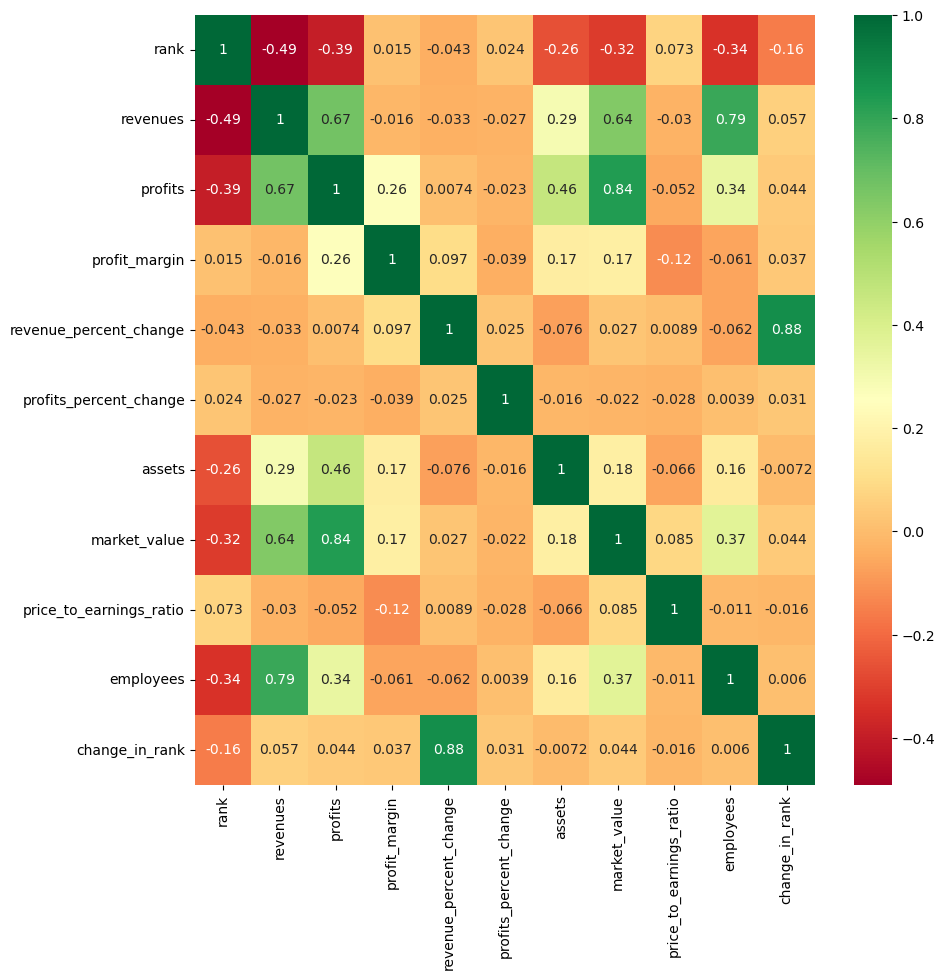

In [ ]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
plt.figure(figsize = (10,10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdYlGn')

##### Observations:

There are many interesting relationships between variables, but the ones that show to have more correlation between each other are **'rank'**, **'revenues'**, **'profits'**, **'assets'**, **'market value'**, and **'employees'**. We can also observe a good relationship between **'revenue percent change'** and **'change in rank'**. The reason that **'rank'** has a negative correlation relationship between with the other variables is that **'rank'** is supposed to decrease while the value of the company increases, so the best company to invest on should be **#1**

    - The most highly related variables are 'Revenue Percent Change' and 'Change in Rank'. This indicates that the most powerful indicator to know if a company is going to go lower or higher in the ranking is the percent of change in the revenue, that is useful to make predictions of the future. It makes sense because those are two of the main variables in the dataset that are related to time. Besides, the value that  most closely relates to the rank position of a company in the rank is the revenue.
    
    - 'Profits' and 'market value' are the second more related variables, meaning that the profit is one of the strongest determinator of how the company will be valued in the stock matket. I would have expected the market value and the assets to be more related, but maybe the 'assets' variable refers to the Asset Book Value instead of the Asset Market Value.
    
    - The third pair of most related variables are 'revenues' and 'employees'. It's interesting how the number of workers in the company is closer to the revenue than the profits are.

<AxesSubplot:xlabel='revenue_percent_change', ylabel='change_in_rank'>

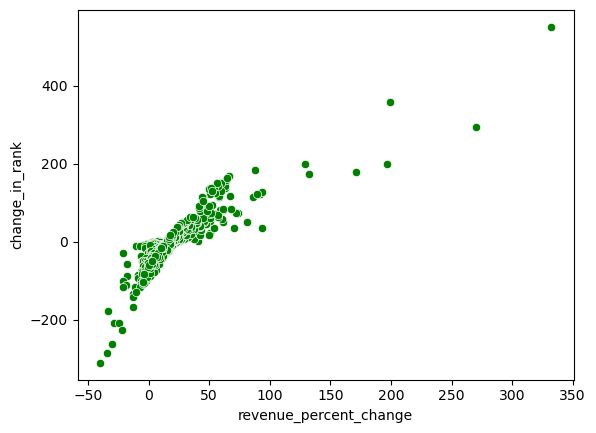

In [ ]:
#Let's plot 'Revenue Percent Change' vs 'revenues'

sns.scatterplot(data = df, x = 'revenue_percent_change', y = 'change_in_rank', color = 'g')

Here, the percental change in revenue almost presents a linear relationship with the change of the companies in the ranking, and this information might be useful to make predictions of which companies are going to have higer or lower ranks in the futre; however, we still can see that some of the companies that managed to increase their revenues up to a 20% or 30%, could still not get a higher ranking, and 50% of increasing in the revenues is the maximum most of them can reach, unlike big massive corporations, which have increased in revenues up to 340% approximately, and 500 places in the ranking.

<AxesSubplot:xlabel='revenues', ylabel='rank'>

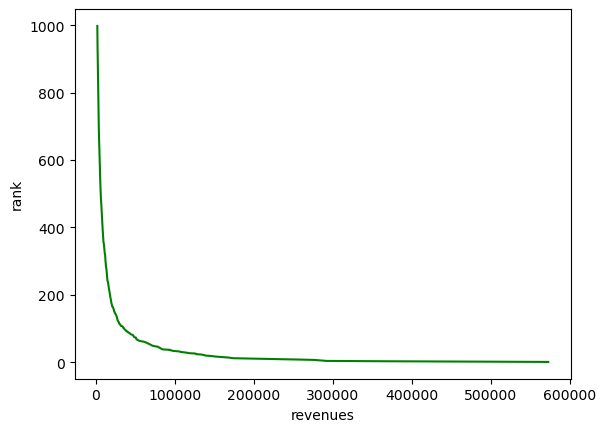

In [ ]:
#Plot of rank vs revenue

sns.lineplot(data = df, x = 'revenues', y = 'rank', color = 'g')

This is quite impressive for a dataset that works with discrete data. Although Revenues and Rank didn't show the highest correlation factor, that happened because that factor is calculated for linear regressions. This one seems to be a logarithmic relation. I think that I've found the most influential factor in the position that a company occupates in the ranking.

<AxesSubplot:xlabel='profits', ylabel='market_value'>

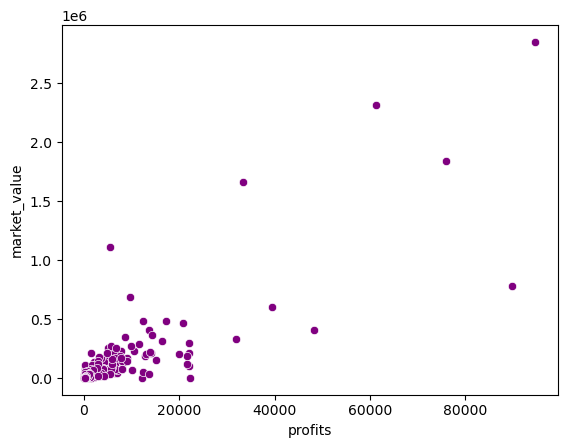

In [ ]:
#Plot of market value vs profits

sns.scatterplot(data = df, x = 'profits', y = 'market_value', color = 'purple')

Here, we can observe how the relationship between these two variables appears to be close at first, but still, the major density of data stays in a range below 10,000 of profit and a quarter million dollars market value. However, there are a few special cases of stocks that get out of that range like the one we can see that is valued over a million dollars and belongs to a company with no more than $5,000 of profits

The ratio between these two data is important and is called the **"Price to Earnings Ratio"**, an important factor to consider when someone is thinking to invest in the stock market. Price to earnings ratio basically means the expectations that the investors have for the growth of a company; so, a higher P/E ratio means higher expectations.

But it also determines a measure of how long will the investor take to recover the initial investment. For example, in a company with a P/E ratio of 15, if you buy the 100% of the actions, you will have to wait 15 years if the company doesn't grow or fall at all during that period. So the P/E ratio should'n be too high or low.

Another important variable to calculate is called the profit margin. It is found by dividing the anual profits over the revenues. In simple words, it tells us how many cents of profit a company keeps for every dollar it spends.

### Task 4: Data Analysis

#### Which is the best company to invest in, based on its profit margin and price to earnings ratio?

Even though the correlation matrix doesn't show much relationship between these two variables, we must se how they behave together:

<AxesSubplot:xlabel='profit_margin', ylabel='price_to_earnings_ratio'>

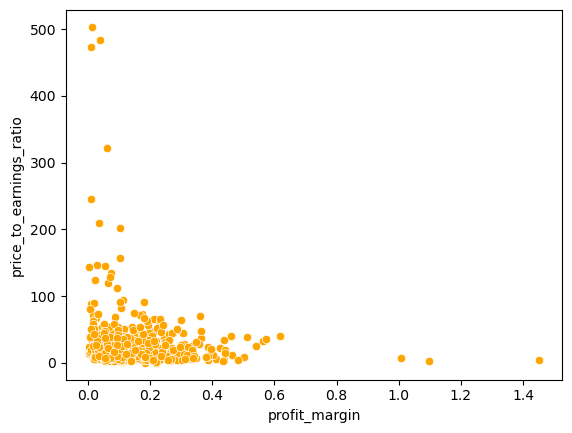

In [ ]:
#Plotting profits vs P/E

sns.scatterplot(data = df, x = 'profit_margin', y = 'price_to_earnings_ratio', color = 'orange')

A good P/E rato in average stands between 20 and 25, while a good profit margin should oscilate between 0.3 and 0.4

By browsing in our data, we can find those companies that have the best relation between these two variables

In [ ]:
df.loc[(df['profit_margin'].between(0.3,0.4, inclusive = True) & (df['price_to_earnings_ratio'].between(20,25, inclusive = True)))]

,rank,name,revenues,profits,profit_margin,revenue_percent_change,profits_percent_change,assets,market_value,price_to_earnings_ratio,employees,change_in_rank
151,152.0,McDonald's,23222.9,7545.2,0.324903,20.9,59.5,53854.3,183873.6,24.369612,200000.0,5.0
297,298.0,CSX,12522.0,3781.0,0.301949,18.3,36.7,40531.0,81587.8,21.578366,20919.0,-6.0
395,396.0,Activision Blizzard,8803.0,2699.0,0.306600,8.9,22.8,25056.0,62559.7,23.178844,9800.0,-23.0
655,656.0,Digital Realty Trust,4427.9,1709.3,0.386029,13.4,379.6,36369.6,40337.7,23.598959,3030.0,-29.0
701,702.0,American Water Works,3930.0,1263.0,0.321374,4.1,78.1,26075.0,30085.5,23.820665,6400.0,-62.0
955,956.0,Signature Bank,2311.3,918.4,0.397352,15.2,73.8,118445.4,18416.9,20.053245,1854.0,NaN


According to the chart and the table, The 6 better companies to invest on the stock market, are McDonald's, CSX, Activision Blizzard, Digital Reality Trust, American Water works and Signature Bank.

In [ ]:
#Exporting dataframe to excel:

df.to_excel('../data/processed/fortune100data_analysis2.xlsx', index = False)